# Part 1: Multi-class Linear SVM

The objective of this project is to implement a *Multi-class Linear Support Vector Machine* (**SVM**) to classify the three species of iris flowers, using the well-known **Iris dataset**: *Iris-setosa*, *Iris-versicolor*, and *Iris-virginica* based on the petal length and petal width features. For this classification task, only these features are used, as they provide the most separable patterns for these three classes.

The model's performance will be evaluated using metrics such as accuracy, confusion matrix, and classification report, and the decision boundaries will be visualized to understand how the SVM separates the classes.

## 1a. Import dependencies

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

## 1b. Load the Dataset and Preprocess

In this section, the Iris dataset will be loaded and there will be the extraction of the required features (*petal length* and *petal width*) along with the corresponding labels. There will be also the encoding of the class labels to numerical values:
   - **Iris-setosa** = $0$
   - **Iris-versicolor** = $1$
   - **Iris-virginica** = $2$

In [2]:
# Read the dataset
df = pd.read_csv('/iris_data.csv', header=0)

# Extract features (petal length and petal width) and target labels
X = df.iloc[:, [2, 3]].values  # Petal length, petal width
y = df.iloc[:, 4].values

# Replace string labels with numerical labels: Setosa = 0, Versicolor = 1, Virginica = 2
y = np.where(y == 'Iris-setosa', 0, np.where(y == 'Iris-versicolor', 1, 2))

# Display the first few rows to confirm the transformation
display(pd.DataFrame(X[:5], columns=['Petal Length', 'Petal Width']))

,Petal Length,Petal Width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


## 2. Train/Test Split

Now, there will the splitting of the dataset into training ($70\%$) and testing ($30\%$) sets using `train_test_split`. Stratified sampling will ensure that each class is proportionally represented in both the training and testing sets.

In [3]:
# Split the dataset into 70% training and 30% testing with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

# Display the shapes of the training and test sets
print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")

Training data shape: (105, 2), Test data shape: (45, 2)


## 3. Feature Scaling

`Standard scaling` will be applied to both training and test data to normalize the feature values, ensuring that both features (petal length and width) are on the same scale. This is important for **SVM** performance.

In [4]:
# Apply standard scaling to the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Calculates the parameters on input data and immediately uses these parameters to transform the data.
X_test_scaled = scaler.transform(X_test) # Only transform the test data using the same scaling parameters

# Display the first few rows of the scaled training data
print("Scaled Training Data (First 10 samples):")
display(pd.DataFrame(X_train_scaled[:10], columns=['Scaled Petal Length', 'Scaled Petal Width']))

# Display the first few rows of the scaled test data
print("\nScaled Test Data (First 10 samples):")
display(pd.DataFrame(X_test_scaled[:10], columns=['Scaled Petal Length', 'Scaled Petal Width']))

Scaled Training Data (First 10 samples):


,Scaled Petal Length,Scaled Petal Width
0,-1.332697,-1.303804
1,-1.165380,-1.303804
2,0.842430,1.444654
3,1.065520,1.182896
4,-1.444242,-1.303804
5,1.009748,1.575533
6,1.567473,1.182896
7,-1.444242,-1.303804
8,1.121293,0.528502
9,0.452023,0.135865



Scaled Test Data (First 10 samples):


,Scaled Petal Length,Scaled Petal Width
0,0.898203,1.444654
1,-1.165380,-1.042046
2,-1.332697,-1.172925
3,0.396250,0.659381
4,0.340478,0.266744
5,0.117388,0.135865
6,1.121293,0.790260
7,0.396250,0.397623
8,0.842430,0.921139
9,-1.388470,-1.042046


## 4. Train the SVM classifier and Evaluation

In this section, a *Support Vector Classifier* (**SVC**) will be trained, using a *linear* kernel and the scaled training data.

There's also the evaluation of the model by generating the training and testing *accuracy* score, the *confusion matrix* for the test set and the *classification report*, which will help to understand properly how well the model performed for each class. The results in the classification report reflect the SVM's ability to distinguish among the three classes.


Training accuracy: 0.952

Test accuracy: 0.978

Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        15
  Versicolor       0.94      1.00      0.97        15
   Virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



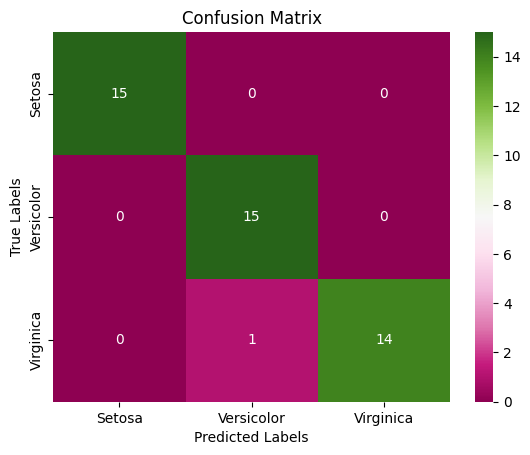

In [5]:
# Train an SVM classifier with a linear kernel
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)

# Print the training accuracy
print(f"\nTraining accuracy: {svm.score(X_train_scaled, y_train):.3f}")
print(f"\nTest accuracy: {svm.score(X_test_scaled, y_test):.3f}")

# Classification report
class_report = classification_report(y_test, svm.predict(X_test_scaled), target_names=['Setosa', 'Versicolor', 'Virginica'])
print("\nClassification Report:\n", class_report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, svm.predict(X_test_scaled))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PiYG', xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Explanation

The *Support Vector Classifier* (**SVC**) shows impressive performance on both the training and test datasets, achieving a training accuracy of $95.2\%$ and a test accuracy of $97.8\%$. This high test accuracy suggests that the model generalizes well and is effective at distinguishing between the three Iris species.

The classification report provides further insights into the model's performance metrics for each class:

- The classifier achieves perfect precision, recall, and F1-score of $1.00$ for the **Setosa** class, which aligns with its clear separation from the other classes in the decision boundary plot. This indicates that the model consistently identifies all Setosa samples correctly without any misclassification.

- The **Versicolor** class has a precision of $0.94$ and a perfect recall of $1.00$, resulting in an F1-score of $0.97$. This suggests that while the classifier accurately identifies Versicolor samples, there is a small number of misclassifications where some Virginica samples may have been classified as Versicolor.

- For **Virginica**, the classifier achieves a precision of $1.00$ and a recall of $0.93$, with an F1-score of $0.97$. This indicates that while the model generally identifies Virginica samples well, a few may be misclassified as Versicolor.

As shown in the confusion matrix, the classifier demonstrates strong performance, with only one misclassification out of $45$ samples, achieving a high level of accuracy. The high true positive counts along the diagonal and low off-diagonal counts reflect the classifier’s effectiveness at distinguishing between the three Iris classes.
Overall, the matrix aligns well with the high accuracy and precision scores seen in the classification report, confirming that the model is effective for this classification task.

## 5. Plot the Decision Boundary

Finally, the **decision boundary** will be plotted, using a custom function to visualize how the SVM model separates the classes in the feature space.

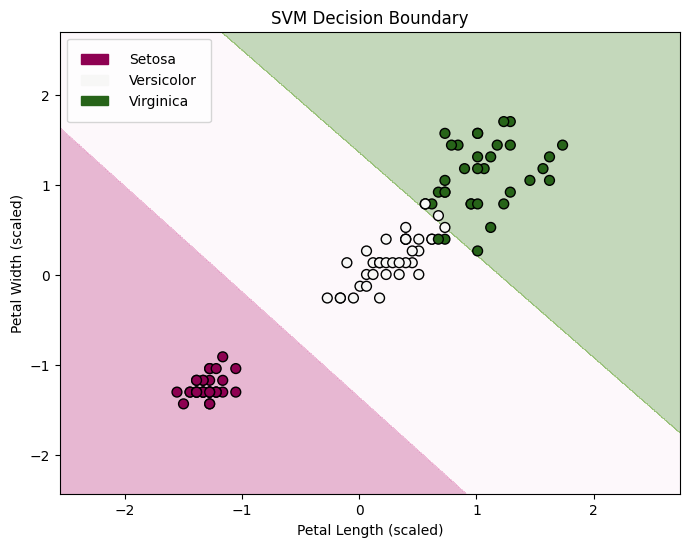

In [6]:
def plot_decision_boundary(X, y, model, steps=1000, cmap='PiYG'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)

    # Define region of interest by data limits
    xmin, xmax = X[:, 0].min() - 1, X[:, 0].max() + 1
    ymin, ymax = X[:, 1].min() - 1, X[:, 1].max() + 1
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across the region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])
    z = labels.reshape(xx.shape)

    # Create the figure and axes
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot the decision boundary
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.3)

    # Scatter plot of the original data points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap, edgecolor='black')

    # Define the colors for the classes based on the colormap
    legend_colors = scatter.cmap(scatter.norm([0, 1, 2]))
    setosa_patch = mpatches.Patch(color=legend_colors[0], label='Setosa')
    versicolor_patch = mpatches.Patch(color=legend_colors[1], label='Versicolor')
    virginica_patch = mpatches.Patch(color=legend_colors[2], label='Virginica')

    # Add labels, title, and legend
    ax.set_xlabel('Petal Length (scaled)')
    ax.set_ylabel('Petal Width (scaled)')
    ax.set_title('SVM Decision Boundary')
    ax.legend(handles=[setosa_patch, versicolor_patch, virginica_patch], loc='upper left', frameon=True, borderpad=1, handletextpad=1.5)
    plt.show()

# Plot decision boundary for the training data
plot_decision_boundary(X_train_scaled, y_train, svm)

## 6. Conclusion

The Support Vector Classifier (SVC) trained with a linear kernel shows strong performance on the Iris dataset. The successful scaling of features, training of the model, and visualization of decision boundaries highlight the effectiveness of this approach. The classifier achieves high accuracy on both training and test data, demonstrating its ability to separate the three classes of Iris flowers.

The decision boundary plot further reveals key insights into the separability of these classes. **Setosa** is distinctly separated from the other classes, indicating a well-defined cluster that the classifier handles with ease. The **Versicolor** and **Virginica** classes, while also separated, display some overlap along their boundary, suggesting a slight challenge in distinguishing them perfectly. Nevertheless, the SVM’s linear decision boundary effectively partitions the feature space, making it a suitable choice for this dataset. Overall, this analysis confirms the SVC's capability to classify the Iris species with high accuracy and provides a clear visualization of its decision-making process.

---

# Part 2: Investigating non-linear SVMs

Some problems are not linearly solvable, and *Support Vector Machines* (**SVMs**) offer a means of addressing non-linearity using kernels. The most commonly used kernels are *linear* (i.e., no kernel) and the *Gaussian* (or *Radial Basis Function*, **RBF**) kernel.

This notebook explores the application of an **RBF kernel** on a randomized generated dataset that is clearly not linearly separable. Linear methods such as the Perceptron, logistic regression, and linear SVM would not effectively separate the examples from the two classes.



## 1a. Import Dependencies

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

## 1b. Data Generation

A randomized dataset will be generated using *Numpy*'s `random` function, consisting of two features. The labels will be assigned based on a non-linear condition.

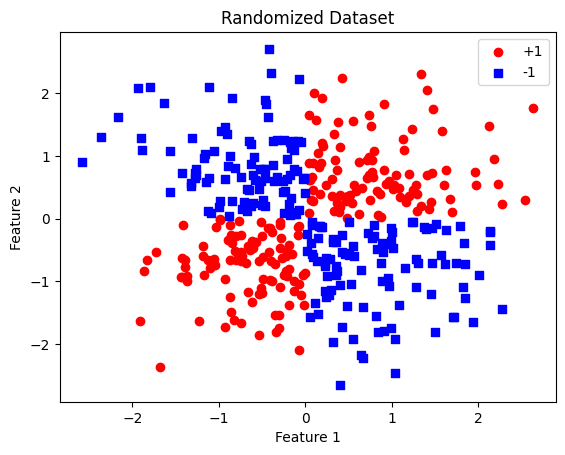

In [11]:
# Generate random data
X_r = np.random.randn(400, 2)
y_r = np.where([x[0] * x[1] > 0 for x in X_r], 1, -1)

# Scatter plot of the data
plt.scatter(X_r[y_r == 1, 0], X_r[y_r == 1, 1], c='r', marker='o', label='+1')
plt.scatter(X_r[y_r == -1, 0], X_r[y_r == -1, 1], c='b', marker='s', label='-1')
plt.title("Randomized Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

## 2. RBF Kernel SVM Model with $\gamma = 0.1$

An SVM model using the RBF kernel will be implemented with a gamma value of $0.1$. This gamma value is considered "soft," balancing smoothness with flexibility. The model will be fitted to the generated dataset.

In [12]:
# Create the SVM model with RBF kernel and gamma value of 0.1
svm_model = svm.SVC(kernel='rbf', gamma=0.1)
svm_model.fit(X_r, y_r)

SVC(gamma=0.1)

## 3. Decision Boundary Visualization

The decision boundary of the fitted SVM model will be visualized. This function creates a contour plot to display the regions predicted by the model.

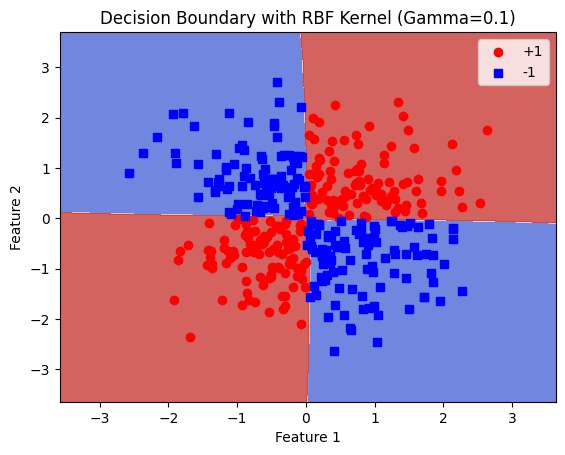

In [13]:
def plot_decision_boundaries(model, X, y):
    """
    Function to plot the decision boundaries of the model.
    """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.8)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='r', marker='o', label='+1')
    plt.scatter(X[y == -1, 0], X[y == -1, 1], c='b', marker='s', label='-1')
    plt.title(f'Decision Boundary with RBF Kernel (Gamma={model.gamma})')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

# Plotting the decision boundaries for the gamma value of 0.1
plot_decision_boundaries(svm_model, X_r, y_r)

### Analysis of Results

The red and blue regions on this plot for a gamma value of $0.1$ represent the predicted class areas for `+1` (**red**) and `-1` (**blue**), respectively. Red circles and blue squares show the actual data points from each class. With a "soft" gamma, the boundary is smooth and generalized, capturing the main structure of the data while allowing some misclassification. This setup balances accuracy and generalization, which helps prevent overfitting on a non-linearly separable dataset.

## 4. Increasing $\gamma$ to $100$

The gamma value will be increased to $100$ to observe the changes in the decision boundary. This adjustment is expected to affect the model's sensitivity to the training data.

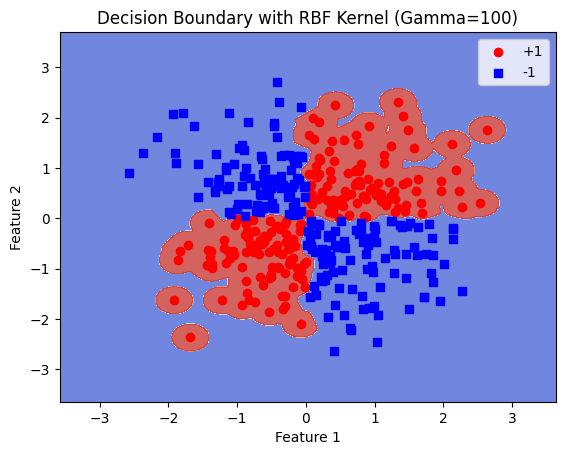

In [14]:
# Create the SVM model with gamma value of 100
svm_model_gamma_100 = svm.SVC(kernel='rbf', gamma=100)
svm_model_gamma_100.fit(X_r, y_r)

# Plot the decision boundaries for the gamma value of 100
plot_decision_boundaries(svm_model_gamma_100, X_r, y_r)

### Analysis of Results

When the gamma value is increased to $100$, the model becomes more sensitive to the training data. Consequently, the decision boundary may fit the noise in the dataset rather than the underlying pattern, leading to **overfitting**. Overfitting occurs when the model captures the details of the training data too closely, which can prevent its generalization to new, unseen data.

## 5. Experimenting with Different $\gamma$ Values

To further understand the impact of the gamma parameter, a range of values will be tested. This will illustrate how varying gamma affects the decision boundaries.


Gamma: 0.001


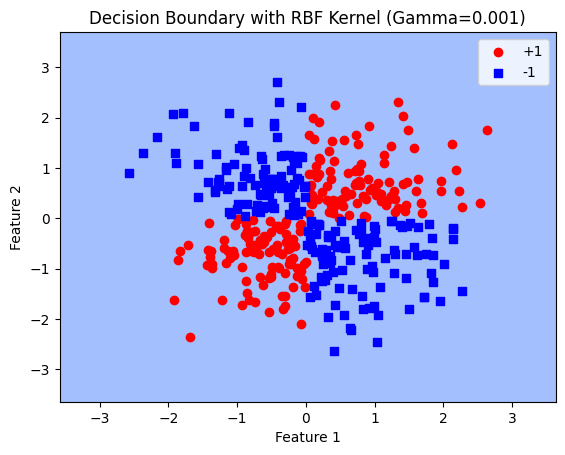


Gamma: 0.01


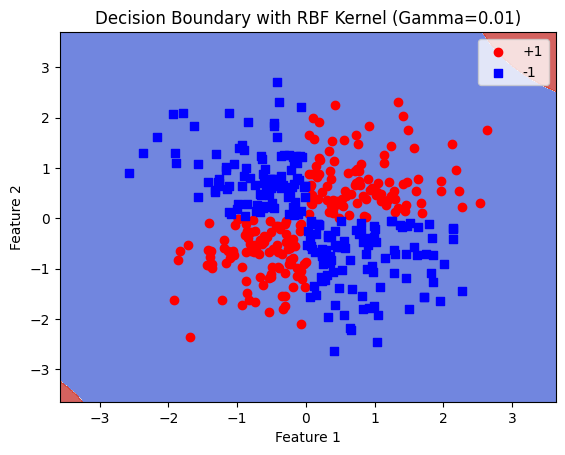


Gamma: 0.1


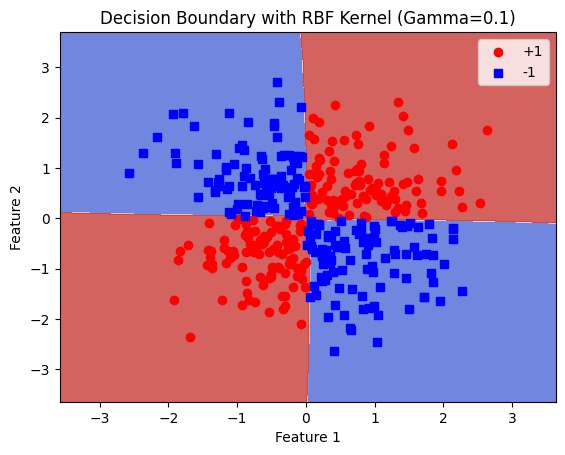


Gamma: 1


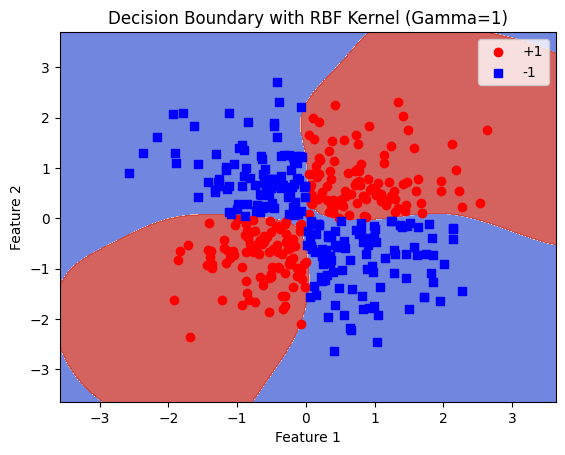


Gamma: 10


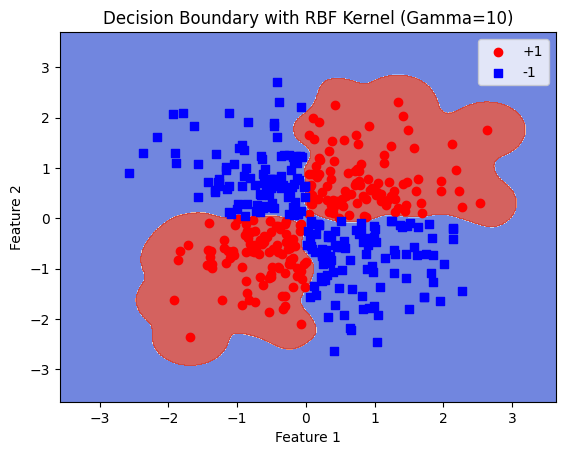


Gamma: 100


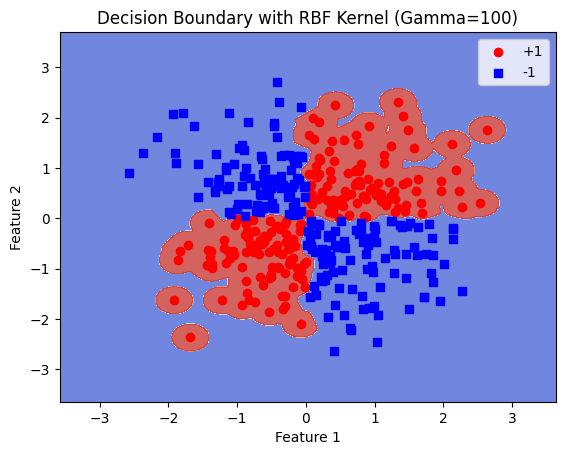

In [15]:
# Experimenting with different gamma values
gamma_values = [0.001, 0.01, 0.1, 1, 10, 100]

for gamma in gamma_values:
    svm_model = svm.SVC(kernel='rbf', gamma=gamma)
    svm_model.fit(X_r, y_r)
    print(f"\nGamma: {gamma}")
    plot_decision_boundaries(svm_model, X_r, y_r)


### Analysis of the results

Different gamma values affect how the SVM decision boundary adapts to the data:

- `gamma = 0.001`: The boundary is almost straight, hardly following the data. This setting underfits, as it’s too simple to capture the patterns in the data.

- `gamma = 0.01`: The boundary is smooth and still very generalized. It doesn’t follow the data closely enough, so it may misclassify points and underfit the data.

- `gamma = 0.1`: As previously discussed, this value provides a nice balance. The boundary captures the general shape of the data without getting too detailed, so it’s likely to generalize well to new data.

- `gamma = 1`: The boundary starts to follow the data more closely, capturing more details. This setting works well for moderately complex data but could start overfitting.

- `gamma = 10`: The boundary becomes much more sensitive to individual points, creating sharp regions. It fits the training data very closely, which can lead to overfitting.

- `gamma = 100`: As previously discussed, the boundary is extremely detailed and tightly follows each point, essentially "memorizing" the data. This level of complexity leads to overfitting and poor generalization to new data.

## 6. Conclusion

This notebook investigated the application of non-linear SVMs using RBF kernels on a randomized dataset. The effects of varying the gamma parameter were observed, highlighting the balance between underfitting and overfitting in model training:

- **Low gamma** values produced smoother decision boundaries, which tended to underfit the data.
- **High gamma** values created highly complex boundaries that overfit to the training data, capturing noise rather than general patterns.

Understanding the impact of kernel parameters is crucial in optimizing SVM performance on complex datasets.

---

# Part 3: Support Vector Machine for Network Intrusion Detection

The **NSL-KDD** dataset is a standard benchmark for training and evaluating *Intrusion Detection Systems* (**IDS**) to classify network traffic as either normal or attack types. This project uses a $20\%$ sample of the NSL-KDD dataset, as it is a quite large one, which contains *categorical*, *binary*, and *numerical* features. The dataset is pre-split into training and testing sets; each feature type will undergo preprocessing, including encoding and standardization for numerical features.

The project involves:

- Training a **binary SVM classifier** (linear and non-linear) to detect attacks and evaluating performance through accuracy and confusion matrix metrics.
- Implementing a **multi-class SVM** to classify specific attack categories.



## 1. Import Dependencies

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

## 2. Data Import and Feature Classification

In this section, the dataset is imported and the feature are divided into three groups: *nominal*, *binary*, and *numerical variables*.

In [17]:
# Load datasets
train_df = pd.read_csv('/KDDTrain_CE4317.csv', header=0)
test_df = pd.read_csv('/KDDTest_CE4317.csv', header=0)

#Separating nominal, binary and numerical features
col_names = train_df.columns.values
nominal_idx = [1, 2, 3]
binary_idx = [6, 11, 13, 14, 19, 20]
numeric_idx = list(set(range(40)).difference(nominal_idx).difference(binary_idx))

nominal_cols = col_names[nominal_idx].tolist()  # Nominal/Categorical features
binary_cols = col_names[binary_idx].tolist()    # Binary features
numeric_cols = col_names[numeric_idx].tolist()  # Numerical features

# Extracting labels and features
train_Y_multi = train_df['attack_category']
train_Y_bin = train_df['attack_binary']
train_X_raw = train_df.drop(['attack_category','attack_binary'], axis=1)
test_Y_multi = test_df['attack_category']
test_Y_bin = test_df['attack_binary']
test_X_raw = test_df.drop(['attack_category','attack_binary'], axis=1)

## 3. Attack Categories Breakdown

A bar chart is used to display the breakdown of different attack categories in the training set. This visualization helps understand the distribution of the classes for multi-class classification (*benign*, *dos*, *probe*, *r2l*, *u2r*).

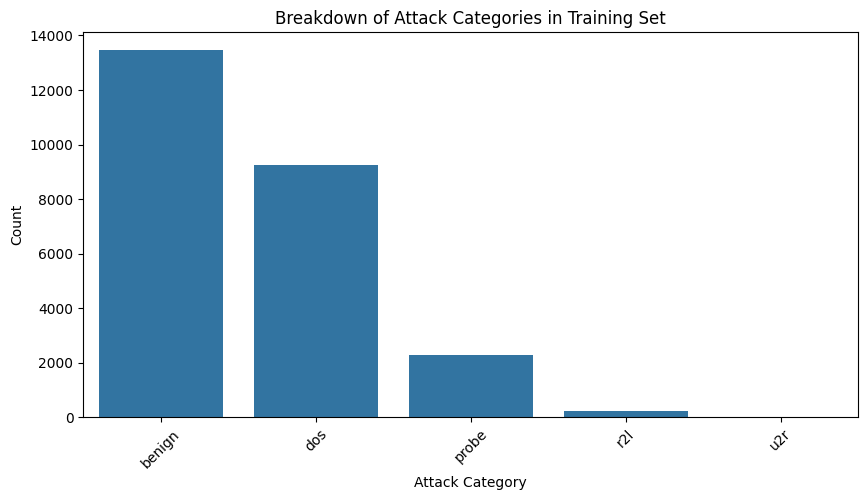

In [20]:
# Plot attack categories
plt.figure(figsize=(10, 5))
sns.countplot(data=train_df, x='attack_category', order=train_df['attack_category'].value_counts().index)
plt.title('Breakdown of Attack Categories in Training Set')
plt.xlabel('Attack Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## 4. Handling Categorical Features

SVM models cannot directly handle categorical features. To address this, the categorical variables are converted into binary (one-hot encoded) representations using `pd.get_dummies()`.

The `pd.get_dummies()` function converts categorical variables into a format that can be provided to ML algorithms to improve predictions. It creates new binary columns for each category, allowing the model to interpret these features numerically. This transformation is crucial for the SVM training process, as it only accepts numerical inputs. This process ensures that the categorical features are represented numerically and can be used for training the SVM model.

In [21]:
# Combining training and test data for consistent feature transformation
combined_df_raw = pd.concat([train_X_raw, test_X_raw])

# One-hot encode the nominal features
combined_df = pd.get_dummies(combined_df_raw, columns=nominal_cols, drop_first=True)

# Split back into train and test sets
train_X = combined_df[:len(train_X_raw)]
test_X = combined_df[len(train_X_raw):]

## 5. Standard Scaling for Numerical Features

Since numerical features can vary in scale, standard scaling is applied to ensure that they have a mean of zero and a standard deviation of one. This step prevents features with larger scales from dominating the model training process. Only the numerical features are scaled, as scaling does not apply to binary features.

In [23]:
# Apply standard scaling to numerical features
scaler = StandardScaler()
train_X.loc[:, numeric_cols] = scaler.fit_transform(train_X[numeric_cols]) # Calculates the parameters on input data and immediately uses these parameters to transform the data.
test_X.loc[:, numeric_cols] = scaler.transform(test_X[numeric_cols]) # Only transform the test data using the same scaling parameters

## 6. Binary Classification using Linear SVM

The binary classification task involves detecting whether the network traffic is an attack or not. A linear SVM model is trained using the default parameters (except for setting the kernel to 'linear'). After training, the confusion matrix and accuracy score are printed to evaluate the model's performance.

Accuracy: 0.7457860184528035


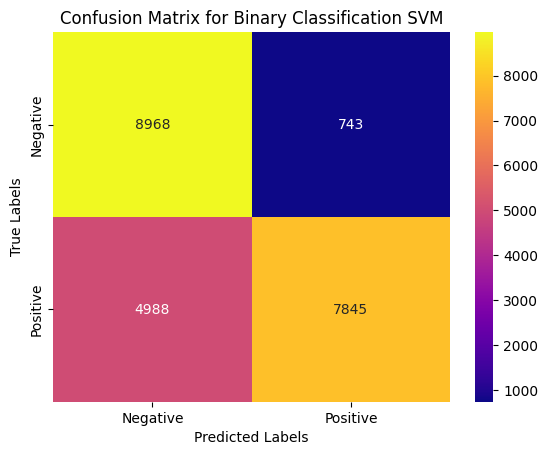

In [24]:
# Train a linear SVM for binary classification
svm_linear = SVC(kernel='linear')
svm_linear.fit(train_X, train_Y_bin)

# Predict and evaluate
binary_predict = svm_linear.predict(test_X)
print("Accuracy:", accuracy_score(test_Y_bin, binary_predict))

# Plotting the confusion matrix
conf_matrix = confusion_matrix(test_Y_bin, binary_predict)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='plasma',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for Binary Classification SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Explanation

The **confusion matrix** provides insight into the number of correct and incorrect predictions, while the **accuracy** score measures the overall percentage of correct predictions.
In the confusion matrix printed above, the rows represent the actual classes, while the columns represent the predicted classes. Specifically, the first row indicates the **true negatives** ($8968$) and **false positives** ($743$), while the second row shows the **false negatives** ($4988$) and **true positives** ($7845$).

The overall accuracy of the model is approximately $74.58\%$, suggesting that about $74.58\%$ of the predictions made by the model are correct. Although this performance is decent, there is still room for improvement, particularly in reducing the number of false negatives, which could help enhance the model's effectiveness in identifying actual intrusions.

## 7. Binary Classification using Non-linear SVM

A non-linear SVM with an **RBF** (*Radial Basis Function*) kernel is trained to see if it performs better than the linear SVM. The parameter gamma controls the influence of each data point on the decision boundary. The initial gamma value is set to $0.1$ and, while most of the parameters are setted as default, the `class_weight` value is setted as `balanced`, to help the model to better learn the characteristics of the classes, leading to a more robust performance on unseen data, especially for the minority class.
The confusion matrix and accuracy score are printed to evaluate the model's performance.

Accuracy: 0.7486692689850958


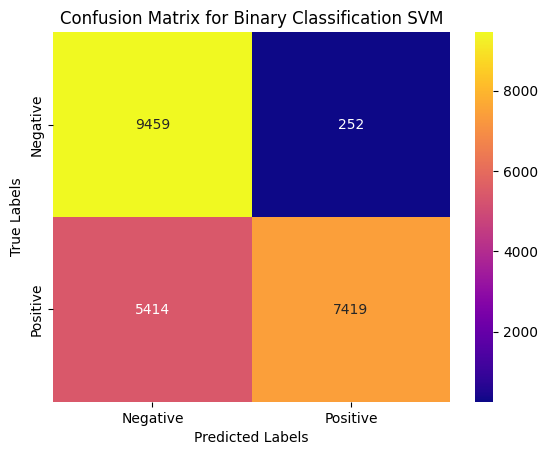

In [25]:
# Train a non-linear SVM using RBF
svm_rbf = SVC(kernel='rbf', gamma=0.1, class_weight='balanced')
svm_rbf.fit(train_X, train_Y_bin)

# Predict and evaluate
binary_predict_rbf = svm_rbf.predict(test_X)
print("Accuracy:", accuracy_score(test_Y_bin, binary_predict_rbf))

# Plotting the confusion matrix
conf_matrix = confusion_matrix(test_Y_bin, binary_predict_rbf)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='plasma',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for Binary Classification SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Explanation

The non-linear SVM with RBF and $\gamma=0.1$ demonstrates a slight improvement in accuracy, increasing almost to $75\%$. This rise indicates that the model's ability to correctly classify network traffic has improved, particularly in its capacity to identify benign traffic with fewer false positives. However, the model still faces challenges with false negatives, suggesting that while the accuracy has marginally increased, there is still room for further optimization in detecting intrusion attempts.

### Parameter Tuning

This section explores the impact of varying the hyperparameter `gamma` on the performance of the *Support Vector Machine* (**SVM**) model with an RBF kernel. A range of `gamma` values, from $0.0001$ to $10$, is defined, and the SVM model is trained for each value. The accuracy of the model is evaluated on the test set, and the results are plotted to visualize how changes in `gamma` affect model performance. This approach facilitates the identification of the optimal `gamma` value that maximizes classification accuracy, demonstrating the significance of hyperparameter tuning in SVM models.

Best gamma: 0.01 - Best accuracy: 0.7609



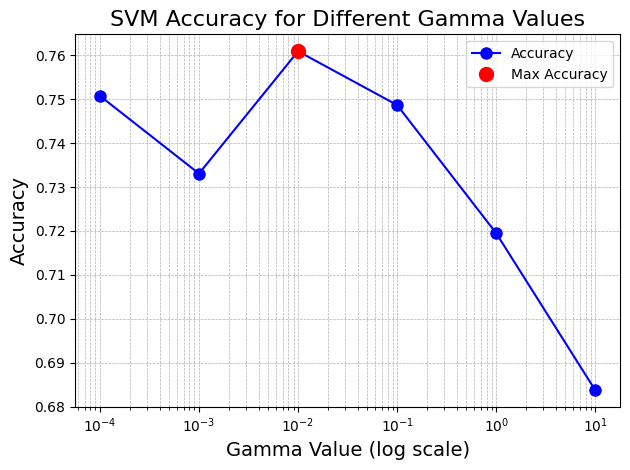

In [26]:
# List of gamma values to test
gamma_values = [0.0001, 0.001, 0.01, 0.1, 1, 10]
accuracies = []

# Loop through the gamma values and train the SVM model
for gamma in gamma_values:
    svm_rbf = SVC(kernel='rbf', gamma=gamma, class_weight='balanced')
    svm_rbf.fit(train_X, train_Y_bin)
    binary_predict = svm_rbf.predict(test_X)
    accuracy = accuracy_score(test_Y_bin, binary_predict)
    accuracies.append(accuracy)

# Print the best accuracy and corresponding gamma value
best_accuracy = max(accuracies)
best_gamma = gamma_values[accuracies.index(best_accuracy)]
print(f"Best gamma: {best_gamma} - Best accuracy: {best_accuracy:.4f}\n")

# Plot the results
plt.plot(gamma_values, accuracies, marker='o', color='b', linestyle='-', markersize=8, label='Accuracy')
max_accuracy_index = np.argmax(accuracies) # Highlight the maximum accuracy point
plt.plot(gamma_values[max_accuracy_index], accuracies[max_accuracy_index], 'ro', markersize=10, label='Max Accuracy')
plt.xscale('log')
plt.xlabel('Gamma Value (log scale)', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('SVM Accuracy for Different Gamma Values', fontsize=16)
plt.grid(which='both', linestyle='--', linewidth=0.5)  # Enhance grid lines
plt.legend()
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

### Explanation

As the tuning of the `gamma` parameter shows in the plot, the best result occurs to be for $\gamma=0.01$ with an **accuracy** score of $76.09\%$. The improved accuracy suggests that the chosen gamma value strikes a better balance between model complexity and generalization, allowing the SVM to capture the underlying patterns in the data more effectively.

## 8. Multi-class Classification using Linear SVM

Finally, a linear SVM is trained for multi-class classification, where the goal is to classify the network traffic into one of five categories: *benign*, *dos*, *probe*, *r2l*, or *u2r*. The confusion matrix and accuracy score are used to evaluate the performance of the multi-class model.

Accuracy: 0.7599361249112846


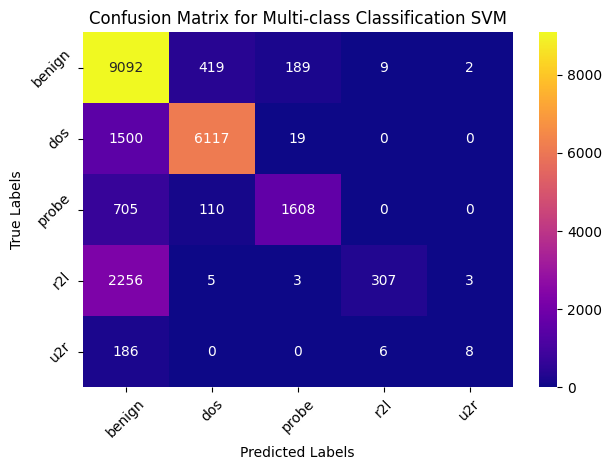

In [27]:
# Train a linear SVM for multi-class classification
svm_multi = SVC(kernel='linear')
svm_multi.fit(train_X, train_Y_multi)

# Predict and evaluate
multi_predict = svm_multi.predict(test_X)
print("Accuracy:", accuracy_score(test_Y_multi, multi_predict))

# Plotting the confusion matrix
conf_matrix = confusion_matrix(test_Y_multi, multi_predict)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='plasma',
            xticklabels=np.unique(test_Y_multi),
            yticklabels=np.unique(test_Y_multi))
plt.title('Confusion Matrix for Multi-class Classification SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

### Explanation

The confusion matrix for a multi-class classifier works like this:

- The first row shows a high number of *true positives* (**TP**) for benign traffic ($9092$), with a small number of misclassifications ($419, 189, 9, 2$) into other classes.
- The second row reflects strong performance in correctly identifying denial-of-service attacks, with $6117$ TPs but some misclassifications ($1500$ into benign and a few into probe).
- The third row indicates that probe attacks were also identified with good accuracy, although there were some misclassifications into benign ($705$ TPs) and a small number into the dos class.
- The fourth row shows that unauthorized access attempts (r2l) were more challenging for the model, with only $307$ correctly classified, while there were $2256$ misclassifications into benign traffic.
- The fifth row reveals that the model struggled the most with user-to-root (u2r) attacks, achieving only $8$ correct classifications while misclassifying $186$ instances as benign and $6$ as unauthorized access.

The model achieved an accuracy of approximately $75.99\%$, which indicates a robust ability to classify most types of network traffic correctly. While the accuracy is commendable, the confusion matrix suggests room for improvement, particularly in distinguishing between unauthorized access and user-to-root attacks.

## 9. Conclusion

This notebook demonstrates the application of *Support Vector Machines* (**SVM**) for both binary and multi-class classification on the **NSL-KDD** dataset. Linear and non-linear SVM models were compared, with parameter tuning applied to the non-linear model. The results show the trade-offs between model complexity and performance, as well as the importance of scaling and encoding features appropriately for SVM training.